<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** RNN and LSTM with TF



# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
import pandas as pd
import math
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import (Dense, Dropout, 
                                     Activation, Flatten, 
                                     MaxPooling2D, SimpleRNN)
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

2022-09-10 16:22:00.715905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Get the data
<hr style = "border:2px solid black" ></hr>

In [2]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
ticker = ['AAPL', 'MSFT']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 1 ,1)
stock_prices = yf.download(ticker,start=start, end = end, interval='1d')\
               .Close

[*********************100%***********************]  2 of 2 completed


In [4]:
diff_stock_prices = stock_prices.diff().dropna()

In [5]:
split = int(len(diff_stock_prices['AAPL'].values) * 0.95)
diff_train_aapl = diff_stock_prices['AAPL'].iloc[:split]
diff_test_aapl = diff_stock_prices['AAPL'].iloc[split:]
diff_train_msft = diff_stock_prices['MSFT'].iloc[:split]
diff_test_msft = diff_stock_prices['MSFT'].iloc[split:]

In [7]:
n_steps = 13
n_features = 1

In [8]:
X_aapl, y_aapl = split_sequence(diff_train_aapl, n_steps)
X_aapl = X_aapl.reshape((X_aapl.shape[0],  X_aapl.shape[1],
                         n_features))

# RNN
<hr style = "border:2px solid black" ></hr>

In [9]:
model = Sequential()
model.add(SimpleRNN(512, activation='relu', 
                    input_shape=(n_steps, n_features),
                    return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

2022-09-10 16:22:42.899061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mse'])

In [11]:
history = model.fit(X_aapl, y_aapl, 
                    epochs=400, batch_size=150, verbose=1, 
                    validation_split = 0.10)

Epoch 1/400
2/2 [==============================] - 1s 315ms/step - loss: 0.6490 - mse: 0.6490 - val_loss: 0.5555 - val_mse: 0.5555
Epoch 2/400
2/2 [==============================] - 0s 49ms/step - loss: 0.6320 - mse: 0.6320 - val_loss: 0.4882 - val_mse: 0.4882
Epoch 3/400
2/2 [==============================] - 0s 56ms/step - loss: 0.5643 - mse: 0.5643 - val_loss: 0.5155 - val_mse: 0.5155
Epoch 4/400
2/2 [==============================] - 0s 51ms/step - loss: 0.5347 - mse: 0.5347 - val_loss: 0.5482 - val_mse: 0.5482
Epoch 5/400
2/2 [==============================] - 0s 49ms/step - loss: 0.5140 - mse: 0.5140 - val_loss: 0.5791 - val_mse: 0.5791
Epoch 6/400
2/2 [==============================] - 0s 51ms/step - loss: 0.4908 - mse: 0.4908 - val_loss: 0.5449 - val_mse: 0.5449
Epoch 7/400
2/2 [==============================] - 0s 50ms/step - loss: 0.4698 - mse: 0.4698 - val_loss: 0.5807 - val_mse: 0.5807
Epoch 8/400
2/2 [==============================] - 0s 52ms/step - loss: 0.4772 - mse: 0.4

2/2 [==============================] - 0s 52ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 64/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.7649 - val_mse: 0.7649
Epoch 65/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.7961 - val_mse: 0.7961
Epoch 66/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0660 - mse: 0.0660 - val_loss: 0.6672 - val_mse: 0.6672
Epoch 67/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.7447 - val_mse: 0.7447
Epoch 68/400
2/2 [==============================] - 0s 53ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.7626 - val_mse: 0.7626
Epoch 69/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 0.5927 - val_mse: 0.5927
Epoch 70/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0277 - mse: 0.0277 - 

2/2 [==============================] - 0s 51ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.6134 - val_mse: 0.6134
Epoch 126/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.5929 - val_mse: 0.5929
Epoch 127/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.5086 - val_mse: 0.5086
Epoch 128/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.6205 - val_mse: 0.6205
Epoch 129/400
2/2 [==============================] - 0s 51ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.5227 - val_mse: 0.5227
Epoch 130/400
2/2 [==============================] - 0s 51ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.5553 - val_mse: 0.5553
Epoch 131/400
2/2 [==============================] - 0s 51ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.6363 - val_mse: 0.6363
Epoch 132/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0197 - mse: 0.

2/2 [==============================] - 0s 49ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.4881 - val_mse: 0.4881
Epoch 188/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.5392 - val_mse: 0.5392
Epoch 189/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.5335 - val_mse: 0.5335
Epoch 190/400
2/2 [==============================] - 0s 53ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.5421 - val_mse: 0.5421
Epoch 191/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.5329 - val_mse: 0.5329
Epoch 192/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.5535 - val_mse: 0.5535
Epoch 193/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.5501 - val_mse: 0.5501
Epoch 194/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0128 - mse: 0.

2/2 [==============================] - 0s 48ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.4974 - val_mse: 0.4974
Epoch 250/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.5014 - val_mse: 0.5014
Epoch 251/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.4758 - val_mse: 0.4758
Epoch 252/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.5503 - val_mse: 0.5503
Epoch 253/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.4737 - val_mse: 0.4737
Epoch 254/400
2/2 [==============================] - 0s 52ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.4636 - val_mse: 0.4636
Epoch 255/400
2/2 [==============================] - 0s 51ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.4875 - val_mse: 0.4875
Epoch 256/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0093 - mse: 0.

2/2 [==============================] - 0s 49ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.4969 - val_mse: 0.4969
Epoch 312/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.5493 - val_mse: 0.5493
Epoch 313/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.5140 - val_mse: 0.5140
Epoch 314/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.4560 - val_mse: 0.4560
Epoch 315/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.4744 - val_mse: 0.4744
Epoch 316/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.4346 - val_mse: 0.4346
Epoch 317/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.4666 - val_mse: 0.4666
Epoch 318/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0085 - mse: 0.

2/2 [==============================] - 0s 49ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.4854 - val_mse: 0.4854
Epoch 374/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.4867 - val_mse: 0.4867
Epoch 375/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.4906 - val_mse: 0.4906
Epoch 376/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.5007 - val_mse: 0.5007
Epoch 377/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.4743 - val_mse: 0.4743
Epoch 378/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.5279 - val_mse: 0.5279
Epoch 379/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.4732 - val_mse: 0.4732
Epoch 380/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0033 - mse: 0.

In [12]:
start = X_aapl[X_aapl.shape[0] - n_steps]
x_input = start
x_input = x_input.reshape((1, n_steps, n_features))

In [13]:
tempList_aapl = []
for i in range(len(diff_test_aapl)):
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_input = np.append(x_input, yhat)
    x_input = x_input[1:]
    tempList_aapl.append(yhat)

In [14]:
X_msft, y_msft = split_sequence(diff_train_msft, n_steps)
X_msft = X_msft.reshape((X_msft.shape[0],  X_msft.shape[1],
                         n_features))

In [15]:
history = model.fit(X_msft, y_msft, 
                    epochs=400, batch_size=150, verbose=1, 
                    validation_split = 0.10)

Epoch 1/400
2/2 [==============================] - 0s 89ms/step - loss: 2.7462 - mse: 2.7462 - val_loss: 0.9256 - val_mse: 0.9256
Epoch 2/400
2/2 [==============================] - 0s 50ms/step - loss: 1.9831 - mse: 1.9831 - val_loss: 1.0059 - val_mse: 1.0059
Epoch 3/400
2/2 [==============================] - 0s 51ms/step - loss: 1.5260 - mse: 1.5260 - val_loss: 1.0104 - val_mse: 1.0104
Epoch 4/400
2/2 [==============================] - 0s 49ms/step - loss: 1.3006 - mse: 1.3006 - val_loss: 1.1334 - val_mse: 1.1334
Epoch 5/400
2/2 [==============================] - 0s 50ms/step - loss: 1.0081 - mse: 1.0081 - val_loss: 1.2899 - val_mse: 1.2899
Epoch 6/400
2/2 [==============================] - 0s 49ms/step - loss: 0.7146 - mse: 0.7146 - val_loss: 1.2916 - val_mse: 1.2916
Epoch 7/400
2/2 [==============================] - 0s 50ms/step - loss: 0.6067 - mse: 0.6067 - val_loss: 1.3532 - val_mse: 1.3532
Epoch 8/400
2/2 [==============================] - 0s 50ms/step - loss: 0.4807 - mse: 0.48

2/2 [==============================] - 0s 49ms/step - loss: 0.0541 - mse: 0.0541 - val_loss: 1.1724 - val_mse: 1.1724
Epoch 64/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 1.0556 - val_mse: 1.0556
Epoch 65/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 1.0634 - val_mse: 1.0634
Epoch 66/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 1.2218 - val_mse: 1.2218
Epoch 67/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 1.3153 - val_mse: 1.3153
Epoch 68/400
2/2 [==============================] - 0s 48ms/step - loss: 0.1025 - mse: 0.1025 - val_loss: 1.0435 - val_mse: 1.0435
Epoch 69/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0723 - mse: 0.0723 - val_loss: 1.1500 - val_mse: 1.1500
Epoch 70/400
2/2 [==============================] - 0s 52ms/step - loss: 0.0655 - mse: 0.0655 - 

2/2 [==============================] - 0s 47ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 1.1023 - val_mse: 1.1023
Epoch 126/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0923 - mse: 0.0923 - val_loss: 1.2837 - val_mse: 1.2837
Epoch 127/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0675 - mse: 0.0675 - val_loss: 1.0921 - val_mse: 1.0921
Epoch 128/400
2/2 [==============================] - 0s 51ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 1.1598 - val_mse: 1.1598
Epoch 129/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 1.0502 - val_mse: 1.0502
Epoch 130/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 1.1502 - val_mse: 1.1502
Epoch 131/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 1.0699 - val_mse: 1.0699
Epoch 132/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0229 - mse: 0.

2/2 [==============================] - 0s 49ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 1.0979 - val_mse: 1.0979
Epoch 188/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 1.1386 - val_mse: 1.1386
Epoch 189/400
2/2 [==============================] - 0s 53ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 1.1433 - val_mse: 1.1433
Epoch 190/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 1.0785 - val_mse: 1.0785
Epoch 191/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0393 - mse: 0.0393 - val_loss: 1.1089 - val_mse: 1.1089
Epoch 192/400
2/2 [==============================] - 0s 52ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 1.0600 - val_mse: 1.0600
Epoch 193/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 1.1386 - val_mse: 1.1386
Epoch 194/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0305 - mse: 0.

2/2 [==============================] - 0s 47ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 1.0528 - val_mse: 1.0528
Epoch 250/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.9278 - val_mse: 0.9278
Epoch 251/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.9409 - val_mse: 0.9409
Epoch 252/400
2/2 [==============================] - 0s 52ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 1.0654 - val_mse: 1.0654
Epoch 253/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 1.0444 - val_mse: 1.0444
Epoch 254/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.9823 - val_mse: 0.9823
Epoch 255/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 1.1012 - val_mse: 1.1012
Epoch 256/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0261 - mse: 0.

2/2 [==============================] - 0s 48ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 1.0649 - val_mse: 1.0649
Epoch 312/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 1.1155 - val_mse: 1.1155
Epoch 313/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 1.0471 - val_mse: 1.0471
Epoch 314/400
2/2 [==============================] - 0s 51ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 1.0691 - val_mse: 1.0691
Epoch 315/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 1.0970 - val_mse: 1.0970
Epoch 316/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 1.0039 - val_mse: 1.0039
Epoch 317/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 1.1155 - val_mse: 1.1155
Epoch 318/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0249 - mse: 0.

2/2 [==============================] - 0s 48ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 1.1423 - val_mse: 1.1423
Epoch 374/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 1.0864 - val_mse: 1.0864
Epoch 375/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 1.0404 - val_mse: 1.0404
Epoch 376/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 1.1349 - val_mse: 1.1349
Epoch 377/400
2/2 [==============================] - 0s 49ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 1.0519 - val_mse: 1.0519
Epoch 378/400
2/2 [==============================] - 0s 48ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.9961 - val_mse: 0.9961
Epoch 379/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 1.0608 - val_mse: 1.0608
Epoch 380/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0273 - mse: 0.

In [16]:
start = X_msft[X_msft.shape[0] - n_steps]
x_input = start
x_input = x_input.reshape((1, n_steps, n_features))

In [17]:
tempList_msft = []
for i in range(len(diff_test_msft)):
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_input = np.append(x_input, yhat)
    x_input = x_input[1:]
    tempList_msft.append(yhat)

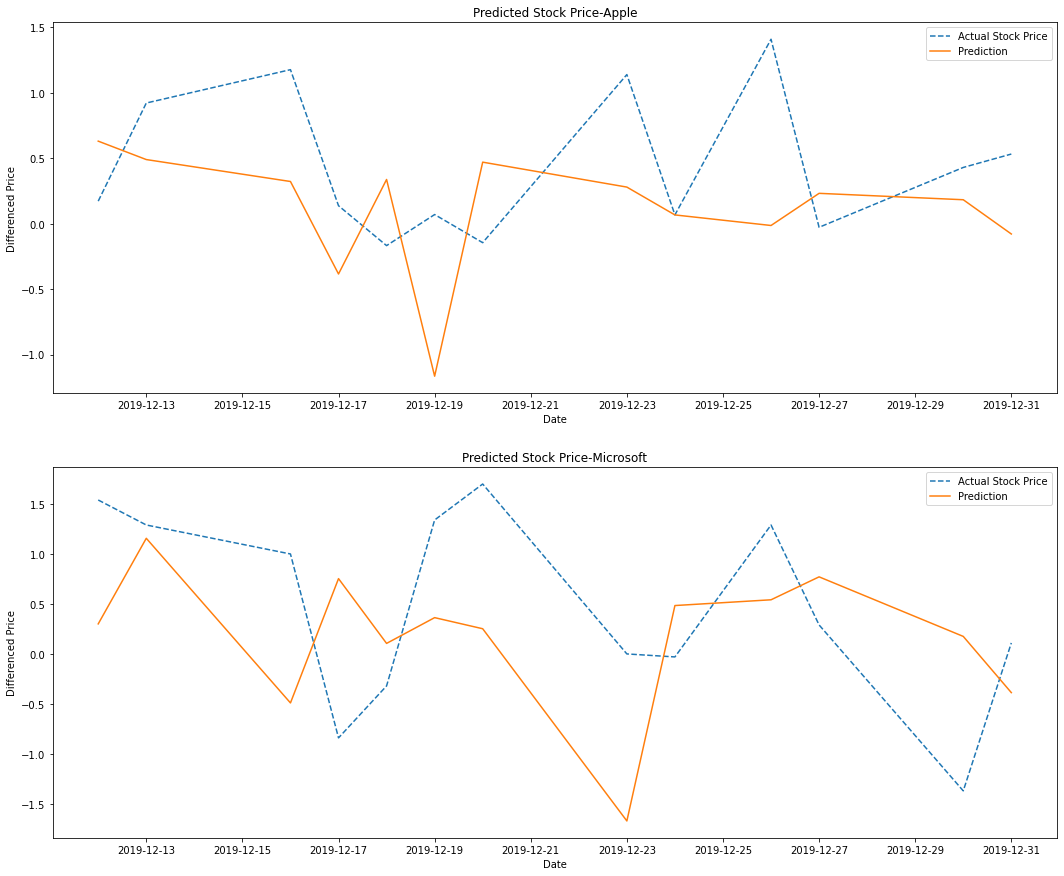

In [18]:
fig, ax = plt.subplots(2,1, figsize=(18,15))
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(diff_test_aapl.index, np.array(tempList_aapl).flatten(),
           linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(diff_test_msft.index,np.array(tempList_msft).flatten(),
           linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')


for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

# LSTM
<hr style = "border:2px solid black" ></hr>


- LSTM tries to attack the weakness of RNN regarding long-term dependencies. 
- LSTM has a quite useful tool to get rid of the unnecessary information so that it works more efficiently. 
- LSTM works with gates, enabling it to forget irrelevant data. 
- These gates are:
    - Forget gates
    - Input gates
    - Output gates



In [20]:
n_steps = 13
n_features = 1

In [21]:
model = Sequential()
model.add(LSTM(512, activation='relu',
          input_shape=(n_steps, n_features),
          return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [22]:
model.compile(optimizer='rmsprop', loss='mean_squared_error',
              metrics=['mse'])

In [23]:
history = model.fit(X_aapl, y_aapl, 
                    epochs=400, batch_size=150, verbose=1, 
                    validation_split = 0.10)

Epoch 1/400
2/2 [==============================] - 3s 486ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 0.4726 - val_mse: 0.4726
Epoch 2/400
2/2 [==============================] - 0s 152ms/step - loss: 0.6256 - mse: 0.6256 - val_loss: 0.4606 - val_mse: 0.4606
Epoch 3/400
2/2 [==============================] - 0s 165ms/step - loss: 0.6196 - mse: 0.6196 - val_loss: 0.4647 - val_mse: 0.4647
Epoch 4/400
2/2 [==============================] - 0s 158ms/step - loss: 0.6187 - mse: 0.6187 - val_loss: 0.4609 - val_mse: 0.4609
Epoch 5/400
2/2 [==============================] - 0s 152ms/step - loss: 0.6175 - mse: 0.6175 - val_loss: 0.4689 - val_mse: 0.4689
Epoch 6/400
2/2 [==============================] - 0s 151ms/step - loss: 0.6251 - mse: 0.6251 - val_loss: 0.4682 - val_mse: 0.4682
Epoch 7/400
2/2 [==============================] - 0s 159ms/step - loss: 0.6212 - mse: 0.6212 - val_loss: 0.4643 - val_mse: 0.4643
Epoch 8/400
2/2 [==============================] - 0s 158ms/step - loss: 0.6181 - m

2/2 [==============================] - 0s 151ms/step - loss: 0.5525 - mse: 0.5525 - val_loss: 0.4285 - val_mse: 0.4285
Epoch 64/400
2/2 [==============================] - 0s 154ms/step - loss: 0.5621 - mse: 0.5621 - val_loss: 0.4244 - val_mse: 0.4244
Epoch 65/400
2/2 [==============================] - 0s 150ms/step - loss: 0.5447 - mse: 0.5447 - val_loss: 0.4283 - val_mse: 0.4283
Epoch 66/400
2/2 [==============================] - 0s 147ms/step - loss: 0.6852 - mse: 0.6852 - val_loss: 0.4790 - val_mse: 0.4790
Epoch 67/400
2/2 [==============================] - 0s 147ms/step - loss: 0.6120 - mse: 0.6120 - val_loss: 0.4339 - val_mse: 0.4339
Epoch 68/400
2/2 [==============================] - 0s 150ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.4366 - val_mse: 0.4366
Epoch 69/400
2/2 [==============================] - 0s 153ms/step - loss: 0.5697 - mse: 0.5697 - val_loss: 0.4649 - val_mse: 0.4649
Epoch 70/400
2/2 [==============================] - 0s 149ms/step - loss: 0.5621 - mse: 0

Epoch 125/400
2/2 [==============================] - 0s 144ms/step - loss: 0.4222 - mse: 0.4222 - val_loss: 0.3967 - val_mse: 0.3967
Epoch 126/400
2/2 [==============================] - 0s 147ms/step - loss: 0.5105 - mse: 0.5105 - val_loss: 0.3704 - val_mse: 0.3704
Epoch 127/400
2/2 [==============================] - 0s 146ms/step - loss: 0.4734 - mse: 0.4734 - val_loss: 0.4281 - val_mse: 0.4281
Epoch 128/400
2/2 [==============================] - 0s 147ms/step - loss: 0.4082 - mse: 0.4082 - val_loss: 0.4216 - val_mse: 0.4216
Epoch 129/400
2/2 [==============================] - 0s 150ms/step - loss: 0.4309 - mse: 0.4309 - val_loss: 0.4286 - val_mse: 0.4286
Epoch 130/400
2/2 [==============================] - 0s 145ms/step - loss: 0.6306 - mse: 0.6306 - val_loss: 0.4191 - val_mse: 0.4191
Epoch 131/400
2/2 [==============================] - 0s 156ms/step - loss: 0.4147 - mse: 0.4147 - val_loss: 0.4195 - val_mse: 0.4195
Epoch 132/400
2/2 [==============================] - 0s 149ms/step - 

2/2 [==============================] - 0s 149ms/step - loss: 0.2920 - mse: 0.2920 - val_loss: 0.4407 - val_mse: 0.4407
Epoch 187/400
2/2 [==============================] - 0s 148ms/step - loss: 0.2806 - mse: 0.2806 - val_loss: 0.5237 - val_mse: 0.5237
Epoch 188/400
2/2 [==============================] - 0s 148ms/step - loss: 0.2546 - mse: 0.2546 - val_loss: 0.4481 - val_mse: 0.4481
Epoch 189/400
2/2 [==============================] - 0s 145ms/step - loss: 0.4595 - mse: 0.4595 - val_loss: 0.5934 - val_mse: 0.5934
Epoch 190/400
2/2 [==============================] - 0s 146ms/step - loss: 0.3640 - mse: 0.3640 - val_loss: 0.5184 - val_mse: 0.5184
Epoch 191/400
2/2 [==============================] - 0s 146ms/step - loss: 0.2967 - mse: 0.2967 - val_loss: 0.6767 - val_mse: 0.6767
Epoch 192/400
2/2 [==============================] - 0s 149ms/step - loss: 0.3680 - mse: 0.3680 - val_loss: 0.4904 - val_mse: 0.4904
Epoch 193/400
2/2 [==============================] - 0s 150ms/step - loss: 0.3342 -

Epoch 248/400
2/2 [==============================] - 0s 171ms/step - loss: 0.2061 - mse: 0.2061 - val_loss: 0.8970 - val_mse: 0.8970
Epoch 249/400
2/2 [==============================] - 0s 160ms/step - loss: 0.3338 - mse: 0.3338 - val_loss: 0.3691 - val_mse: 0.3691
Epoch 250/400
2/2 [==============================] - 0s 179ms/step - loss: 0.2033 - mse: 0.2033 - val_loss: 0.4730 - val_mse: 0.4730
Epoch 251/400
2/2 [==============================] - 0s 165ms/step - loss: 0.1457 - mse: 0.1457 - val_loss: 0.5136 - val_mse: 0.5136
Epoch 252/400
2/2 [==============================] - 0s 163ms/step - loss: 0.1686 - mse: 0.1686 - val_loss: 0.3853 - val_mse: 0.3853
Epoch 253/400
2/2 [==============================] - 0s 171ms/step - loss: 0.2131 - mse: 0.2131 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 254/400
2/2 [==============================] - 0s 153ms/step - loss: 0.2530 - mse: 0.2530 - val_loss: 0.7005 - val_mse: 0.7005
Epoch 255/400
2/2 [==============================] - 0s 156ms/step - 

2/2 [==============================] - 0s 152ms/step - loss: 0.1522 - mse: 0.1522 - val_loss: 0.6693 - val_mse: 0.6693
Epoch 310/400
2/2 [==============================] - 0s 153ms/step - loss: 0.1296 - mse: 0.1296 - val_loss: 0.6334 - val_mse: 0.6334
Epoch 311/400
2/2 [==============================] - 0s 149ms/step - loss: 0.1581 - mse: 0.1581 - val_loss: 0.5213 - val_mse: 0.5213
Epoch 312/400
2/2 [==============================] - 0s 162ms/step - loss: 0.1020 - mse: 0.1020 - val_loss: 0.5145 - val_mse: 0.5145
Epoch 313/400
2/2 [==============================] - 0s 157ms/step - loss: 0.0916 - mse: 0.0916 - val_loss: 0.4428 - val_mse: 0.4428
Epoch 314/400
2/2 [==============================] - 0s 146ms/step - loss: 0.1725 - mse: 0.1725 - val_loss: 0.4305 - val_mse: 0.4305
Epoch 315/400
2/2 [==============================] - 0s 146ms/step - loss: 0.1896 - mse: 0.1896 - val_loss: 0.4791 - val_mse: 0.4791
Epoch 316/400
2/2 [==============================] - 0s 157ms/step - loss: 0.1473 -

Epoch 371/400
2/2 [==============================] - 0s 153ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.5349 - val_mse: 0.5349
Epoch 372/400
2/2 [==============================] - 0s 159ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.5912 - val_mse: 0.5912
Epoch 373/400
2/2 [==============================] - 0s 147ms/step - loss: 0.0575 - mse: 0.0575 - val_loss: 0.7823 - val_mse: 0.7823
Epoch 374/400
2/2 [==============================] - 0s 156ms/step - loss: 0.1704 - mse: 0.1704 - val_loss: 0.5617 - val_mse: 0.5617
Epoch 375/400
2/2 [==============================] - 0s 151ms/step - loss: 0.0865 - mse: 0.0865 - val_loss: 0.5371 - val_mse: 0.5371
Epoch 376/400
2/2 [==============================] - 0s 148ms/step - loss: 0.0532 - mse: 0.0532 - val_loss: 0.5815 - val_mse: 0.5815
Epoch 377/400
2/2 [==============================] - 0s 156ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.7086 - val_mse: 0.7086
Epoch 378/400
2/2 [==============================] - 0s 157ms/step - 

In [24]:
start = X_aapl[X_aapl.shape[0] - 13]
x_input = start
x_input = x_input.reshape((1, n_steps, n_features))

In [25]:
tempList_aapl = []
for i in range(len(diff_test_aapl)):
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_input = np.append(x_input, yhat)
    x_input = x_input[1:]
    tempList_aapl.append(yhat)

In [26]:
history = model.fit(X_msft, y_msft, 
                    epochs=400, batch_size=150, verbose=1, 
                    validation_split = 0.10)

Epoch 1/400
2/2 [==============================] - 0s 189ms/step - loss: 4.1399 - mse: 4.1399 - val_loss: 1.3094 - val_mse: 1.3094
Epoch 2/400
2/2 [==============================] - 0s 163ms/step - loss: 2.5746 - mse: 2.5746 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 3/400
2/2 [==============================] - 0s 154ms/step - loss: 2.4374 - mse: 2.4374 - val_loss: 1.7634 - val_mse: 1.7634
Epoch 4/400
2/2 [==============================] - 0s 152ms/step - loss: 2.4551 - mse: 2.4551 - val_loss: 0.8887 - val_mse: 0.8887
Epoch 5/400
2/2 [==============================] - 0s 151ms/step - loss: 2.3465 - mse: 2.3465 - val_loss: 0.9285 - val_mse: 0.9285
Epoch 6/400
2/2 [==============================] - 0s 151ms/step - loss: 2.2798 - mse: 2.2798 - val_loss: 1.0893 - val_mse: 1.0893
Epoch 7/400
2/2 [==============================] - 0s 153ms/step - loss: 2.1343 - mse: 2.1343 - val_loss: 1.1834 - val_mse: 1.1834
Epoch 8/400
2/2 [==============================] - 0s 154ms/step - loss: 2.1076 - m

2/2 [==============================] - 0s 158ms/step - loss: 0.4429 - mse: 0.4429 - val_loss: 1.9145 - val_mse: 1.9145
Epoch 64/400
2/2 [==============================] - 0s 158ms/step - loss: 0.4187 - mse: 0.4187 - val_loss: 2.6706 - val_mse: 2.6706
Epoch 65/400
2/2 [==============================] - 0s 171ms/step - loss: 0.6396 - mse: 0.6396 - val_loss: 1.3682 - val_mse: 1.3682
Epoch 66/400
2/2 [==============================] - 0s 159ms/step - loss: 0.4457 - mse: 0.4457 - val_loss: 2.2610 - val_mse: 2.2610
Epoch 67/400
2/2 [==============================] - 0s 156ms/step - loss: 0.5033 - mse: 0.5033 - val_loss: 2.1385 - val_mse: 2.1385
Epoch 68/400
2/2 [==============================] - 0s 162ms/step - loss: 0.4263 - mse: 0.4263 - val_loss: 1.9955 - val_mse: 1.9955
Epoch 69/400
2/2 [==============================] - 0s 157ms/step - loss: 0.4540 - mse: 0.4540 - val_loss: 1.7169 - val_mse: 1.7169
Epoch 70/400
2/2 [==============================] - 0s 163ms/step - loss: 0.6674 - mse: 0

Epoch 125/400
2/2 [==============================] - 0s 154ms/step - loss: 0.3602 - mse: 0.3602 - val_loss: 1.4313 - val_mse: 1.4313
Epoch 126/400
2/2 [==============================] - 0s 154ms/step - loss: 0.3178 - mse: 0.3178 - val_loss: 1.0156 - val_mse: 1.0156
Epoch 127/400
2/2 [==============================] - 0s 147ms/step - loss: 0.5053 - mse: 0.5053 - val_loss: 1.3845 - val_mse: 1.3845
Epoch 128/400
2/2 [==============================] - 0s 151ms/step - loss: 0.4308 - mse: 0.4308 - val_loss: 1.8580 - val_mse: 1.8580
Epoch 129/400
2/2 [==============================] - 0s 153ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 1.6430 - val_mse: 1.6430
Epoch 130/400
2/2 [==============================] - 0s 150ms/step - loss: 0.1378 - mse: 0.1378 - val_loss: 2.0846 - val_mse: 2.0846
Epoch 131/400
2/2 [==============================] - 0s 151ms/step - loss: 0.2326 - mse: 0.2326 - val_loss: 1.7053 - val_mse: 1.7053
Epoch 132/400
2/2 [==============================] - 0s 153ms/step - 

2/2 [==============================] - 0s 163ms/step - loss: 0.1798 - mse: 0.1798 - val_loss: 1.8269 - val_mse: 1.8269
Epoch 187/400
2/2 [==============================] - 0s 155ms/step - loss: 0.0805 - mse: 0.0805 - val_loss: 2.0282 - val_mse: 2.0282
Epoch 188/400
2/2 [==============================] - 0s 151ms/step - loss: 0.1359 - mse: 0.1359 - val_loss: 2.1907 - val_mse: 2.1907
Epoch 189/400
2/2 [==============================] - 0s 152ms/step - loss: 0.1075 - mse: 0.1075 - val_loss: 1.9859 - val_mse: 1.9859
Epoch 190/400
2/2 [==============================] - 0s 151ms/step - loss: 0.1136 - mse: 0.1136 - val_loss: 1.4799 - val_mse: 1.4799
Epoch 191/400
2/2 [==============================] - 0s 160ms/step - loss: 0.2507 - mse: 0.2507 - val_loss: 1.5056 - val_mse: 1.5056
Epoch 192/400
2/2 [==============================] - 0s 145ms/step - loss: 0.3210 - mse: 0.3210 - val_loss: 1.3017 - val_mse: 1.3017
Epoch 193/400
2/2 [==============================] - 0s 145ms/step - loss: 0.2060 -

Epoch 248/400
2/2 [==============================] - 0s 163ms/step - loss: 0.0757 - mse: 0.0757 - val_loss: 1.2840 - val_mse: 1.2840
Epoch 249/400
2/2 [==============================] - 0s 162ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 1.2192 - val_mse: 1.2192
Epoch 250/400
2/2 [==============================] - 0s 158ms/step - loss: 0.0399 - mse: 0.0399 - val_loss: 1.7521 - val_mse: 1.7521
Epoch 251/400
2/2 [==============================] - 0s 156ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 1.5877 - val_mse: 1.5877
Epoch 252/400
2/2 [==============================] - 0s 163ms/step - loss: 0.1139 - mse: 0.1139 - val_loss: 2.6500 - val_mse: 2.6500
Epoch 253/400
2/2 [==============================] - 0s 162ms/step - loss: 0.2584 - mse: 0.2584 - val_loss: 2.4834 - val_mse: 2.4834
Epoch 254/400
2/2 [==============================] - 0s 154ms/step - loss: 0.4930 - mse: 0.4930 - val_loss: 1.9790 - val_mse: 1.9790
Epoch 255/400
2/2 [==============================] - 0s 163ms/step - 

2/2 [==============================] - 0s 178ms/step - loss: 0.0749 - mse: 0.0749 - val_loss: 1.2973 - val_mse: 1.2973
Epoch 310/400
2/2 [==============================] - 0s 160ms/step - loss: 0.0737 - mse: 0.0737 - val_loss: 1.3195 - val_mse: 1.3195
Epoch 311/400
2/2 [==============================] - 0s 158ms/step - loss: 0.1102 - mse: 0.1102 - val_loss: 1.1634 - val_mse: 1.1634
Epoch 312/400
2/2 [==============================] - 0s 160ms/step - loss: 0.1362 - mse: 0.1362 - val_loss: 1.0424 - val_mse: 1.0424
Epoch 313/400
2/2 [==============================] - 0s 168ms/step - loss: 0.3621 - mse: 0.3621 - val_loss: 1.7063 - val_mse: 1.7063
Epoch 314/400
2/2 [==============================] - 0s 159ms/step - loss: 0.3640 - mse: 0.3640 - val_loss: 1.5118 - val_mse: 1.5118
Epoch 315/400
2/2 [==============================] - 0s 173ms/step - loss: 0.0909 - mse: 0.0909 - val_loss: 1.9496 - val_mse: 1.9496
Epoch 316/400
2/2 [==============================] - 0s 150ms/step - loss: 0.0573 -

Epoch 371/400
2/2 [==============================] - 0s 153ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 1.5742 - val_mse: 1.5742
Epoch 372/400
2/2 [==============================] - 0s 187ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 1.4910 - val_mse: 1.4910
Epoch 373/400
2/2 [==============================] - 0s 163ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 1.3559 - val_mse: 1.3559
Epoch 374/400
2/2 [==============================] - 0s 161ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 1.4002 - val_mse: 1.4002
Epoch 375/400
2/2 [==============================] - 0s 160ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 1.5748 - val_mse: 1.5748
Epoch 376/400
2/2 [==============================] - 0s 152ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 1.4853 - val_mse: 1.4853
Epoch 377/400
2/2 [==============================] - 0s 155ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 1.8031 - val_mse: 1.8031
Epoch 378/400
2/2 [==============================] - 0s 170ms/step - 

In [27]:
start = X_msft[X_msft.shape[0] - 13]
x_input = start
x_input = x_input.reshape((1, n_steps, n_features))

In [28]:
tempList_msft = []
for i in range(len(diff_test_msft)):
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_input = np.append(x_input, yhat)
    x_input = x_input[1:]
    tempList_msft.append(yhat)

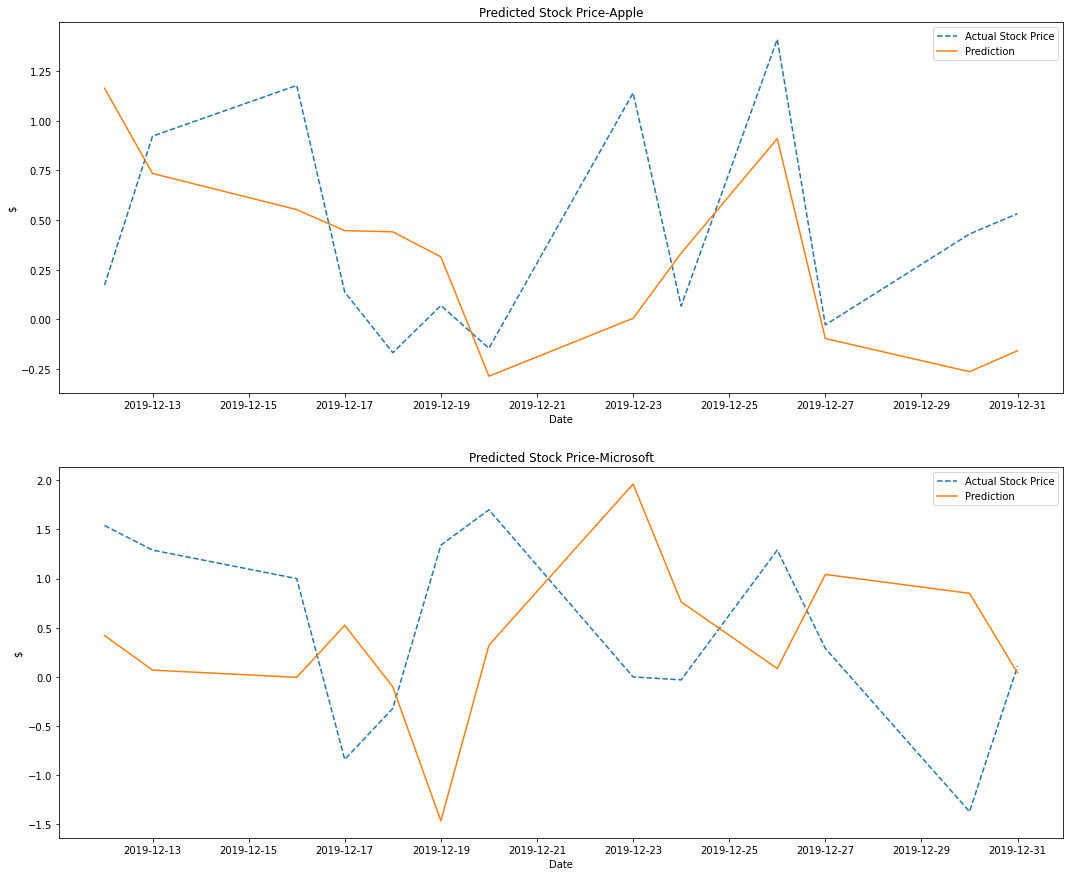

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(diff_test_aapl.index, np.array(tempList_aapl).flatten(),
           linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(diff_test_msft.index, np.array(tempList_msft).flatten(),
           linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')

for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='$')
plt.show()

# References
<hr style = "border:2px solid black" ></hr>


- https://github.com/abdullahkarasan/mlfrm/blob/main/codes/chp_3.ipynb
- Machine Learning for Financial Risk Management with Python Abdullah Karasan
    
